In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import sklearn.model_selection as ModelSelection
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Data acquired from https://yle.fi/uutiset/3-10725384
# Contains YLE election compass data for parlamentary elections 2019

In [14]:
df = pd.read_csv('Avoin_data_eduskuntavaalit_2019_valintatiedot.csv', delimiter=',')

In [15]:
X_cat = df.loc[:, 'Suomen pitää olla edelläkävijä ilmastonmuutoksen vastaisessa taistelussa, vaikka se aiheuttaisi suomalaisille kustannuksia.':'On oikein nähdä vaivaa sen eteen, ettei vahingossakaan loukkaa toista.'].replace('-', np.nan).astype('category')

In [17]:
y = df.puolue

In [18]:
X_train, X_test, y_train, y_test = ModelSelection.train_test_split(X_cat, y, test_size=.2, random_state=42)

In [19]:
pipe_svc = Pipeline([
    # Yeah not too smart way to handle missing data at this instance but has to do for now
    ('imp', SimpleImputer(missing_values=np.nan, strategy='mean')), 
    ('scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('svc', SVC())])

In [27]:
param_grid = {
    'svc__gamma':[1e-05, 1e-04, 1e-03],
    'svc__C': [240, 241, 242, 243, 244, 245],
    'pca__n_components':[26, 25, 24]
    }
gs_svc = GridSearchCV(pipe_svc, param_grid=param_grid, cv=5, scoring='f1_micro')

In [28]:
gs_svc.fit(X_train, y_train)

/Users/santerivaataja/Desktop/Vaalidata.nosync/vaali_venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imp', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [26, 25, 24],
                         'svc__C': [240, 241, 242, 243, 244, 245],
                         'svc__gamma': [1e-05, 0.0001, 0.001]},
             scoring='f1_micro')

In [29]:
print(f"For training data: \n\tScore: {gs_svc.best_score_} with values {gs_svc.best_params_}")

For training data: 
	Score: 0.5679770614989124 with values {'pca__n_components': 25, 'svc__C': 240, 'svc__gamma': 0.0001}


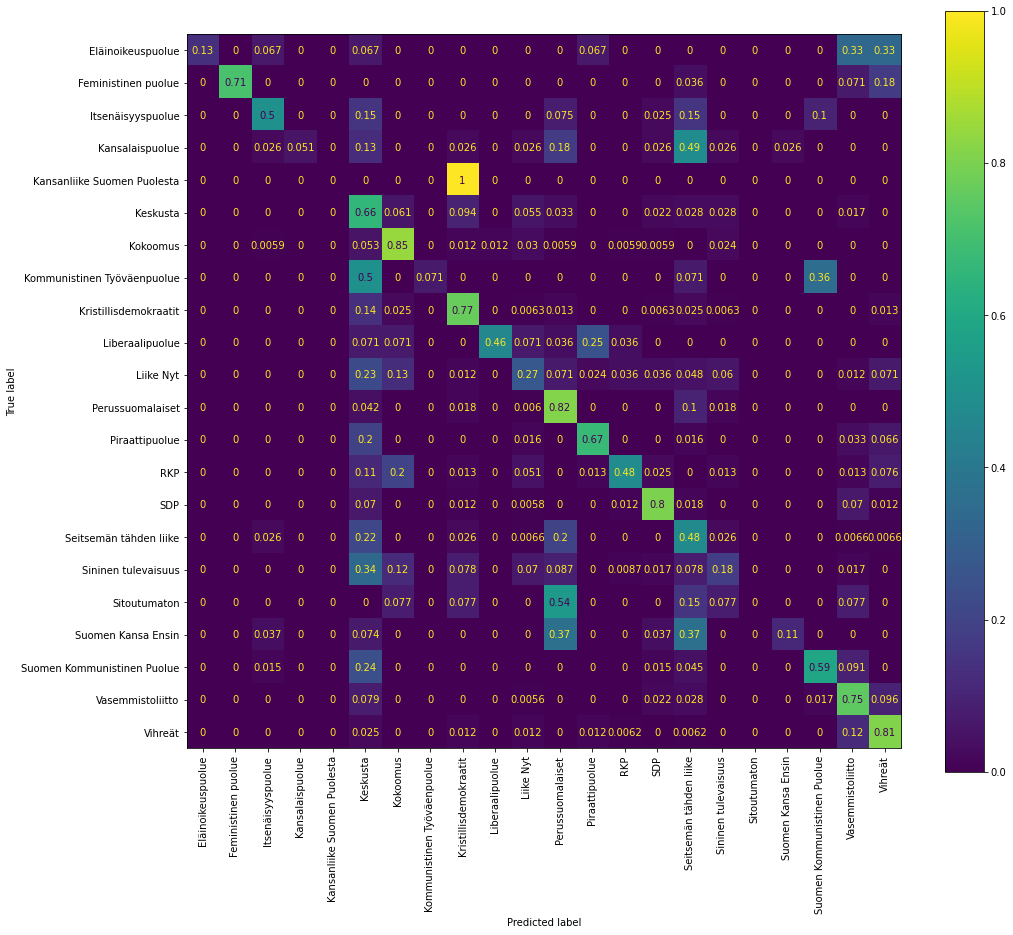

In [39]:
fig, ax = plt.subplots(figsize=(16,14))
plot_confusion_matrix(gs_svc, X_train, y_train, normalize='true', xticks_rotation='vertical', ax=ax)
plt.show()